<a href="https://colab.research.google.com/github/Deshmukh20/GRIPSEP2021/blob/main/task_2_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:- Mugdha Deshmukh

THE SPARKS FOUNDATION - GRIP-DATA SCIENCE AND BUSINESS ANALYST

Task 2 : prediction using unsupervised ml
Goal:- from the given 'IRIS' dataset , predict the optimal number of clusters and represent it visually 

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

READING THE DATASET

In [ ]:
dataset=pd.read_csv('Iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#how many rows and column does data contains
dataset.shape

(150, 6)

In [ ]:
#checking column data type and null values
dataset.info

<bound method DataFrame.info of       Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]>

In [ ]:
#first five rows of data
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#check any null values
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#get statistical info
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#taking first four rows i.e., [row,column]=> [start:stop , start:stop]
#iloc in pandas is used to select rows and column by number , in the order that they appear in the data frame 
X= dataset.iloc [:,:4]
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [ ]:
from sklearn.cluster import KMeans

#an ideal way to find out right number of clusters would be to clculate the within-cluster-sum-of-squares (WCSS)
#WCSS is the sum of squares of the distances of each datapoint in all clusters to their respective centroids .
#inertia is the sum of squared error for each cluster, Therefore the smaller the inertia the denser the cluster.
#KMeans++ ; selects initial clusters centers from k-Maean clustering in a smart way to speed up convergence.


print ("finding the K")
WCSS =[]
for i in range (1,10):
  Kmeans = KMeans(n_clusters=i,init='k-means++')
  Kmeans.fit(X)
  WCSS.append(Kmeans.inertia_)
  print ("K:{}".format((i))+":"+str(Kmeans.inertia_))

finding the K
K:1:281831.54466666665
K:2:70581.3808
K:3:31320.711199999998
K:4:17777.809912280703
K:5:11422.682565813868
K:6:7919.436803846154
K:7:5903.236422172031
K:8:4568.956235367831
K:9:3648.38140934444


<function matplotlib.pyplot.show>

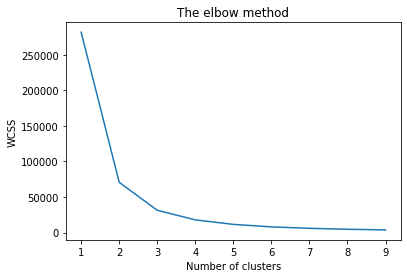

In [ ]:
plt.plot(range(1,10),WCSS)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    #within cluster sum of square
plt.show

We can see that after 3 the drop in WCSS is minimal .so we choose 3 as an optimal number of cluster


In [ ]:
#applying kmeans to the data set /creating the kmeans classifier
#n_init(int,default:10)-number of time the kmeans algorithm will be run with different centroids seeds
#the final result will be the best output of the n_init constructive runs in terms of inertia.
#max_iter(init,default:300)- maximum number of iterations of the kmeans algorithm for a single run


kmeans =KMeans (n_clusters=3 , init='k-means++' , max_iter=300 , n_init=10 , random_state=0 )
y_kmeans =kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

<function matplotlib.pyplot.show>

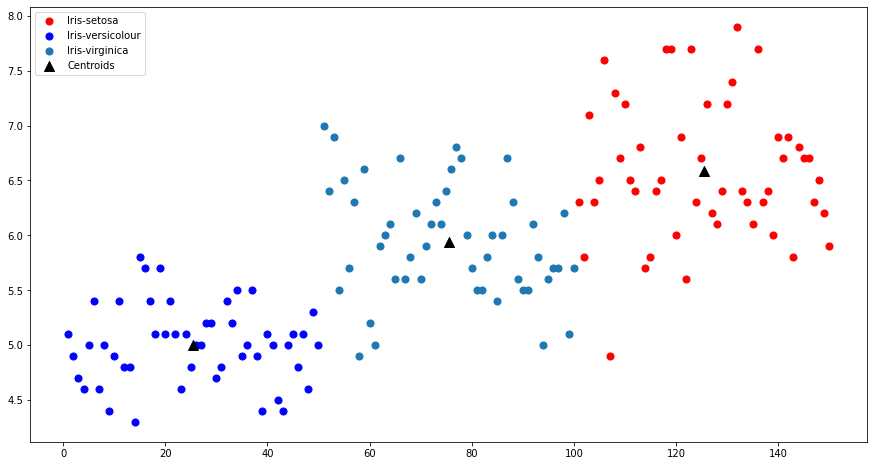

In [ ]:
#visualizing the clusters and centroids
#s means marker size
#visualizing in 2d

plt.figure(figsize=(15,8))
X=np.array(X)
plt.scatter(X[y_kmeans==0,0],
            X[y_kmeans==0,1],
            s=50 ,c='red',
            label='Iris-setosa')
plt.scatter(X[y_kmeans==1,0],
            X[y_kmeans==1,1],
            s=50 , c='blue',
            label='Iris-versicolour')
plt.scatter(X[y_kmeans==2,0],
            X[y_kmeans==2,1],
            s=50 , label='Iris-virginica')

#plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=100 , c='black', marker='^',
            label='Centroids')
plt.legend()
plt.show
